In [1]:
#Import important libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 

import logging
logging.getLogger('tensorflow').disabled = True #To prevent warnings from showing.

from mtcnn.mtcnn import MTCNN #The deep learning model used to perfrom face detection

* I have three text documents/files containing the 2D grid of pixel values for three different images, I will read the image data of each image into this notebook 
* I will read the text document in line by line, and store them in seperate lists, then I will write a function to clean each image data. 


* The image data is stored in three different text files named: 'input00.txt', input01.txt' and 'input02.txt'
* I will read them into this notebook and save them in lists
* I will read-in each text document line by line, and store them in different lists
* I will use Python's 'open()' function to open each file, and access it's content 
* **NOTE**: The text files are in a folder named 'input', so I have to include the full file path for each text document to be able to read in the text document.

In [2]:
#The list contains our file paths.
file_names = ['input/input00.txt', 'input/input01.txt', 'input/input02.txt']

#lists that will store each text document/file.
img1 = []
img2 = []
img3 = []


for file_name in file_names:                      #Iterating through the list that contains the names of my files
    with open(file_name) as file_object:          #Opening each file and creating a file object for each file
        for line in file_object:                  #Iterating through each line in a file 
            if file_name == 'input/input00.txt':  #Check for the first file, 'input00'
                img1.append(line)                 #store the contents of the first file in the list, 'img1'
            elif file_name == 'input/input01.txt':#Check for the second file, 'input01' 
                img2.append(line)                 #storing the contents of the second file in the list, 'img2'
            else:
                img3.append(line)                 #storing the contents of the third file in the list, img3.

* Let'see what the data in first and second line of the first text file looks like 

In [3]:
print(img1[0:2])

['418 870\n', '2,6,184 31,24,158 79,57,129 112,71,98 117,63,68 120,63,64 133,80,77 143,90,80 124,67,58 127,64,60 125,61,61 115,54,52 109,50,40 116,55,41 132,59,51 141,58,57 127,60,57 127,60,57 126,59,56 124,60,56 123,59,55 123,59,55 122,59,55 123,61,55 122,60,54 124,60,55 125,61,56 128,62,57 128,62,57 130,62,55 128,60,53 127,59,52 131,59,51 131,59,51 132,60,52 131,62,53 132,63,54 133,64,55 133,64,55 133,64,55 133,64,55 134,65,56 136,64,56 136,64,56 135,63,55 135,62,54 133,60,52 132,59,51 133,58,50 132,57,49 132,57,49 133,58,50 134,59,51 136,61,53 138,60,53 139,61,54 138,60,53 137,59,52 134,56,49 130,52,45 128,50,43 128,50,43 131,53,46 134,56,49 137,59,52 136,58,51 136,58,51 135,57,50 135,57,50 135,57,50 135,57,50 135,57,50 135,57,50 135,57,50 136,58,51 136,58,51 136,58,51 136,58,51 136,58,51 136,58,51 135,57,50 135,57,50 136,58,51 136,58,51 137,59,52 136,61,53 136,61,53 137,62,54 135,62,54 136,63,55 137,64,56 137,64,56 137,64,56 136,64,56 135,63,55 134,62,54 128,63,55 128,63,55 127,62,

* We can see what our image data looks like above, the first line contains the dimension of the first image, followed by space indicated by the '\n' then the second line contains pixel values of the first row in the image data.
* Each pixel will be represented by three comma-separated values denoting the Blue, Green, and Red components, respectively
* So we can see the first pixel is '2, 6, 184', and the last pixel is '1, 10, 151', and then another space ('\n')

* The first file has 418 rows and has 870 pixels per row, the second picture has 173 rows and 291 pixels per row, and the third picture contains 288 rows and 460 pixels per row

* We have alredy been told, The first line of input will contain two integers, R  and C, representing the number of rows and columns of image pixels, respectively.
* Let's see the  first line of each file.

In [4]:
#Let's print the first line of each file 
print('First file: ', img1[0])
print('=' * 80)

print('Second file: ', img2[0])
print('=' * 80)

print('Third file: ', img3[0])

First file:  418 870

Second file:  173 291

Third file:  288 460



* From the outputs above:
    * The pixel values of the first image has 418 rows and 870 columns,
    * The pixel values of the Second image has 173 rows and 291 columns,
    * The pixel values of the Third image has 288 rows and 460 columns,

* The length of each list storing each image data should be the same as the number of rows in each image data 
* Although since the first line of each text file contains the number of rows and columns of our image data, the length of our lists will be more than the number of rows by 1 value. E.g. The length of 'img1' will be 419 because the first line which contains the dimensions of the image is also being counted, remove that line and the length becomes 418 which corresponds with the information given.
* I will remove the first lines, and check the length of the lists later

In [5]:
print("Length of the first image data list: ", len(img1))
print("=" * 80)

print("Length of the second image data list: ", len(img2))
print("=" * 80)

print("Length of the third image data list: ", len(img3))

Length of the first image data list:  419
Length of the second image data list:  174
Length of the third image data list:  289


* But there is a problem, all of the image data in each file was read in as a string, and we know our image data are actually numbers (integers), so we need to convert the data in each list to type 'integer'

In [6]:
#Lists that will store the first line after converting the values to integers
img1_line1 = []
img2_line1 = []
img3_line1 = []

for i in (img1, img2, img3):            #iterating through our image data lists
    im = i[0].split()                   #Taking the first line in each image data list, and splitting the elements on that line.
                                        #After splitting, each element on that line is stored in a list in string format.
    for j in im:                        #iterating through the list containing the elements
        if i == img1:                   #Check for the first image data list 
            img1_line1.append(int(j))   #adding the elements (now in integer form) to a new list 'img1_line1'
        elif i == img2:                 #Check for the second image data list 
            img2_line1.append(int(j))   #adding the elements (now in integer form) to a new list, 'img2_line2'
        else:
            img3_line1.append(int(j))   #adding the elements (now in integer form) to a new list, 'img3_line3'
    del i[0]

In [7]:
#let's see the lists containing the first line of each image data list
print('img1_line1: ' + str(img1_line1) + ' ==== ' +' img2_line1: ' + str(img2_line1) + ' ==== ' + ' img3_line1: ' + str(img3_line1))

img1_line1: [418, 870] ====  img2_line1: [173, 291] ====  img3_line1: [288, 460]


In [8]:
#Checking the length of each image data list again, they should now be the same with the number of rows of the image data
#they are holding

print("Length of the first image data list: ", len(img1))
print("=" * 80)

print("Length of the second image data list: ", len(img2))
print("=" * 80)

print("Length of the third image data list: ", len(img3))

Length of the first image data list:  418
Length of the second image data list:  173
Length of the third image data list:  288


* The first file has 418 rows and has 870 pixels per row, the second picture has 173 rows and 291 pixels per row, and the third picture contains 288 rows and 460 pixels per row


* Now, I will clean up this data, and then store each cleaned data in a numpy array in a format that can be viewed as an image.

* The final image array of each image will be a rank3 array, which will have a shape in the form of (x1, x2, 3)
    * Where x1 = number of rows
    *       x2 = number of columns, or number of pixels per row in each image and 
    *       3 is the number of color channels in our array.
    
* E.g. the shape of the first image after cleaning should be (418, 870, 3)
    
* To get a rank3 array from a list, the list has to have 2 nested lists within it. (a list of lists of lists)



* Right now since our data was read-in in string format, All the pixels in each row of our image data is stored as 1 string value which contains pixels seperated by a space as a delimiter. i.e. for row 1 in image 1 we have '2, 6, 184 .... 1, 10, 151'

* Remember, each pixel is represented by three comma-separated values denoting the Blue, Green, and Red components (3 colour channels) respectively. The first pixel in the first row of the first image is '2,6,184'


* We want to store each pixel in it's own list, and then each row will contain all the pixels in that row in a single list, and then all the rows in that image will be stored in another single list. 
* E.g. The first image has 418 rows, and 870 pixels per row. Each 870 pixels per row will stored in seperate lists i.e. we will have 870 lists in each row, and then each 418 rows containing 870 lists each which will be stored in a single list. And that way we have a list of lists (418 lists) of lists(870 lists). i.e. the first row of the first image should look like: [2, 6, 184] ... [1, 10, 151]



* Now I will Iterate through each of the 418 lists in the first image data list,
* Recall the pixels are all still in string format, and all the pixel in each row will are still grouped together as a single string value. So I will change the 3 comma seperated numbers in each pixel into integer values, and store them in a list.

* I will create a function to take in each image data list, and then output them in the right format.

In [9]:
def clean_image_data_list(image_data_list):
    """Function to clean image data list"""
    check = 50                                #variable that will update us about how many rows have been cleaned
    clean_image_data = []                     #List to store our cleaned image data
    
    for i, row in enumerate(image_data_list): #Iterating through the rows in the image data list,
        each_row = row.split()                #Taking the joined pixels in each row, and instead of one whole string value, 
                                              #seperating them into string pixels seperated by ',' e.g. instead 
                                              #of '2, 6, 184 ... 1, 10, 151' we have '2, 6, 184', ..., '1, 10, 151'
        
        str_new_row = []        
        for pixel in each_row:                   #iterating through the ',' seperated string pixels
            str_new_row.append(pixel.split(',')) #splitting the 3 comma seperated values(color channels) in each pixel and 
                                                 #storing them in a new list we now have 
                                                 #['2', '6', 184], ..., ['1', '10', '151']
                                                 #now I will convert each of the 3 string values(color channels) in each pixel 
                                                 #into integers 
                                                         
            int_new_row = []                             #List to store pixels containing integer values
            for str_pixel in str_new_row:                #Iterating through the string pixels in each row
                int_pixel = []                           #List to store integer values(color channel) of each pixel
                for color_channel in str_pixel:          #Iterating through the string values (color channel) in each pixel
                    int_pixel.append(int(color_channel)) #changing the str vals(color ch) to ints and storing them in a new list
                int_new_row.append(int_pixel)            #storing the list containing each pixel with int vals in a new list
                
        #conditional statement to update us on the number of rows that have been cleaned
        if i == check:
            print(str(i) + ' rows cleaned out of ' + str(len(image_data_list)) + ' ==> ', end = '')
            check += 50
        if i == len(image_data_list)-1:
            print("All cleaned up")
            
        clean_image_data.append(int_new_row)             #storing each row containing pixels containing int vals in a new list.
        
    return clean_image_data

* I will now apply the function to 3 image data, 'img1', 'img2' and 'img3'
* **NOTE:** This might take some time depending on how large the dimensions of the image data is

In [10]:
#For the first image
img1 = clean_image_data_list(img1)

50 rows cleaned out of 418 ==> 100 rows cleaned out of 418 ==> 150 rows cleaned out of 418 ==> 200 rows cleaned out of 418 ==> 250 rows cleaned out of 418 ==> 300 rows cleaned out of 418 ==> 350 rows cleaned out of 418 ==> 400 rows cleaned out of 418 ==> All cleaned up


In [11]:
#For the second image
img2 = clean_image_data_list(img2)

50 rows cleaned out of 173 ==> 100 rows cleaned out of 173 ==> 150 rows cleaned out of 173 ==> All cleaned up


In [12]:
#For the third image
img3 = clean_image_data_list(img3)

50 rows cleaned out of 288 ==> 100 rows cleaned out of 288 ==> 150 rows cleaned out of 288 ==> 200 rows cleaned out of 288 ==> 250 rows cleaned out of 288 ==> All cleaned up


* All our image data are now in the clean format we want them to be.
* Let's see a slice of each cleaned image data list after cleaning.

In [13]:
#The first image data
img1[0][0:10] #Just the first 10 pixels in the first row of our first image data

[[2, 6, 184],
 [31, 24, 158],
 [79, 57, 129],
 [112, 71, 98],
 [117, 63, 68],
 [120, 63, 64],
 [133, 80, 77],
 [143, 90, 80],
 [124, 67, 58],
 [127, 64, 60]]

In [14]:
#The first image data
img1[0][0:10] #Just the first 10 pixels in the first row of our second image data

[[2, 6, 184],
 [31, 24, 158],
 [79, 57, 129],
 [112, 71, 98],
 [117, 63, 68],
 [120, 63, 64],
 [133, 80, 77],
 [143, 90, 80],
 [124, 67, 58],
 [127, 64, 60]]

In [15]:
#The third image data
img1[0][0:10] #Just the first 10 pixels in the first row of our third image data

[[2, 6, 184],
 [31, 24, 158],
 [79, 57, 129],
 [112, 71, 98],
 [117, 63, 68],
 [120, 63, 64],
 [133, 80, 77],
 [143, 90, 80],
 [124, 67, 58],
 [127, 64, 60]]

In [16]:
#Checking the length of each cleaned image data to make sure we have the right number of rows 

print("Length of the first image data list (CLEANED): ", len(img1))
print("=" * 80)

print("Length of the second image data list (CLEANED): ", len(img2))
print("=" * 80)

print("Length of the third image data list (CLEANED): ", len(img3))

Length of the first image data list (CLEANED):  418
Length of the second image data list (CLEANED):  173
Length of the third image data list (CLEANED):  288


* Everything is intact, so I will now convert each image data list into numpy arrays, and changed their data type to 'uint8'
* The data type 'uint8' can be described as: **Unsigned integer (0 to 255)** 
* Our pixel values will be in the range 0 to 255, so the data type 'uint8' is perfect for us. 
* Now I will convert it to a numpy array with datatype of 'uint8' which is the datatype for image data

In [17]:
image1 = np.array(img1, dtype = 'uint8')
image2 = np.array(img2, dtype = 'uint8')
image3 = np.array(img3, dtype = 'uint8')

In [18]:
#Checking the shape of our array
print(image1.shape, image2.shape, image3.shape)

(418, 870, 3) (173, 291, 3) (288, 460, 3)


In [19]:
#Let's see the first 1o pixels of the first row of each image array
#Image1 array
image1[0][0:10]

array([[  2,   6, 184],
       [ 31,  24, 158],
       [ 79,  57, 129],
       [112,  71,  98],
       [117,  63,  68],
       [120,  63,  64],
       [133,  80,  77],
       [143,  90,  80],
       [124,  67,  58],
       [127,  64,  60]], dtype=uint8)

In [20]:
#Image2 array
image2[0][0:10]

array([[190, 119,  69],
       [190, 119,  69],
       [191, 120,  70],
       [192, 121,  71],
       [192, 121,  71],
       [193, 122,  72],
       [194, 123,  73],
       [194, 123,  73],
       [194, 123,  73],
       [195, 124,  74]], dtype=uint8)

In [21]:
#Image3 array
image3[0][0:10]

array([[174, 155, 147],
       [176, 155, 147],
       [177, 156, 148],
       [179, 157, 146],
       [180, 158, 146],
       [180, 159, 144],
       [183, 160, 145],
       [181, 160, 145],
       [187, 166, 151],
       [184, 165, 150]], dtype=uint8)

### Now I will visualize all the images
* I will use matplotlib's 'imshow()' function for this

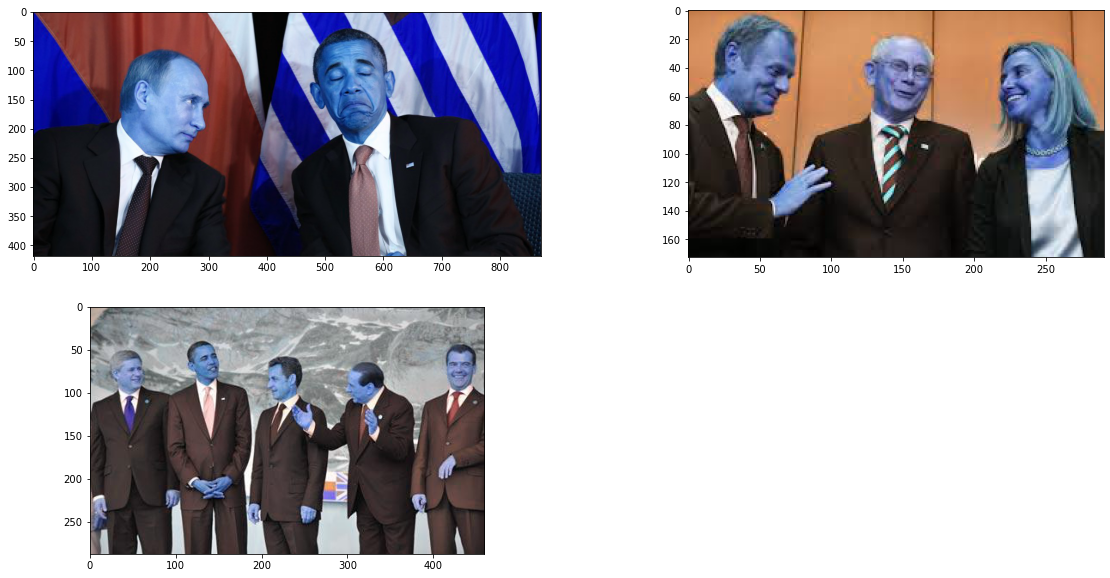

In [22]:
fig=plt.figure(figsize=(20, 10))

fig.add_subplot(2, 2, 1)
plt.imshow(image1)

fig.add_subplot(2, 2, 2)
plt.imshow(image2)

fig.add_subplot(2, 2, 3)
plt.imshow(image3)

#### We can see our image looks weird, this is because the input format of the color channels is BGR, I will convert it to RGB
* I will use the 'cv2' (compuer vision's) module to change the color format of my images

In [23]:
#change the colour format from BGR to RGB.
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

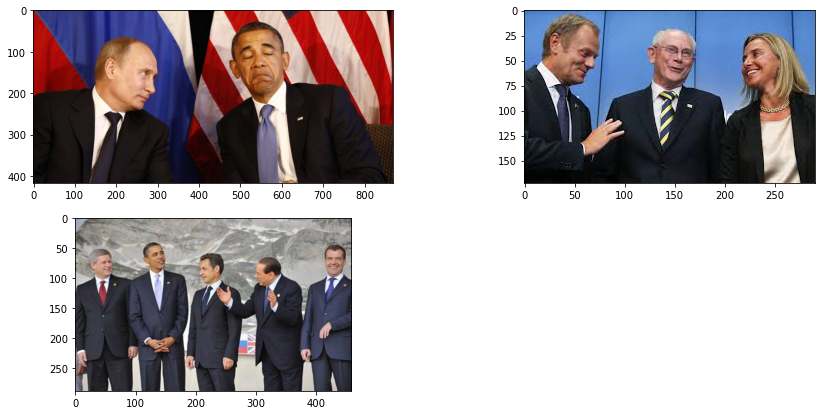

In [24]:
#Let's see the images again.

fig=plt.figure(figsize=(15, 7))

fig.add_subplot(2, 2, 1)
plt.imshow(image1)

fig.add_subplot(2, 2, 2)
plt.imshow(image2)

fig.add_subplot(2, 2, 3)
plt.imshow(image3)

* Now we have successfully converted our image arrays into actual images, and visualized them.
* Now we will use a face detection model to detect the faces in the image

# Facial Detection Model
* The main task here is to count the number of faces in each picture.
* As a human, I can see that we have 2 faces in the first picture, 3 images in the second picture, and 5 pictures in the 3rd picture, but a computer doesn't know this. Computer Vision is the field of data science where we teach computers to see images, and the world at large like a human does.
* For a computer to see the world like humans, we feed it lots of image data, depending on the object we want it to see.
* Here we want the computer to count the number of faces, ideally we will get lot's of pictures of human faces and feed them into a machine learning or deep learning model preferably deep learning model because we get to use things like Neural Networks which can learn from hundreds of thousands of data.
* I don't have any training data for the task at hand, and getting them would take a while, so I am gonna use an a pretrained model to detect the faces in each of our pictures.
* The pretrained model I am going to use is the Multitask Cascaded Convolutional Neural Network (mtcnn)

## Face Detection using the Multitask Cascaded Convolutional Neural Network (mtcnn)
* The MTCNN is popular because it achieved then state-of-the-art results on a range of benchmark datasets, and because it is capable of also recognizing other facial features such as eyes and mouth, called landmark detection.

* The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid), then the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes, and the third model (Output Network or O-Net) proposes facial landmarks.
* The model is called a multi-task network because each of the three models in the cascade (P-Net, R-Net and O-Net) are trained on three tasks, e.g. make three types of predictions; they are: face classification, bounding box regression, and facial landmark localization.
* The mtcnn module is very easy to use as seen below

    1. I will create an instance of the model/network using the default weights. The default weights are the weighs gotten from the training data used to train this model, I can add the weights of my own training data if I have any which I don't, so I used the default weights.
    2. Apply the images to the model. I created a function 'detect_faces' for number 1 and 2.
    3. Then I created another function 'draw_image_with_boxes' to see the part of the image the model detected as faces, and to make sure it detected the right thing.
    4. Then I applied both functions to the 3 images and printed out a single integer value, the number of faces in each image.

In [25]:
#I will create a function to detect faces using mtcnn:
def detect_faces(image):
    detector = MTCNN()                              #creating an instance of the network/model using default weights
    detected_faces = detector.detect_faces(image)   #detect faces in the image
    return detected_faces

In [26]:
#I will create another function to draw a rectangle on the faces the model detected
def draw_image_with_boxes(image, detected_faces):
    count = 0
    data = image                                                          #load the image
    plt.imshow(data)                                                      # plot the image
    ax = plt.gca()                                                        # get the context for drawing boxes
    for result in detected_faces:                                         # plot each box
        x, y, width, height = result['box']                               # get coordinates
        rect = Rectangle((x, y), width, height, fill=False, color='red')  # create the rectangle
        ax.add_patch(rect)                                                # draw the rectangle on the image
        plt.title('Image')
    plt.show()                                                            # show the plot
    
    for i in detected_faces:                                              #function to count number of detected faces
        count += 1
    print(str(count) + '\n')

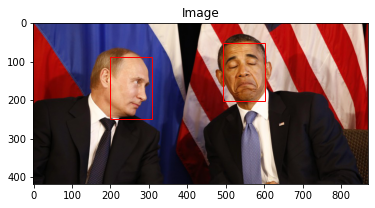

2



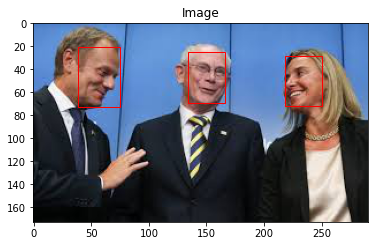

3



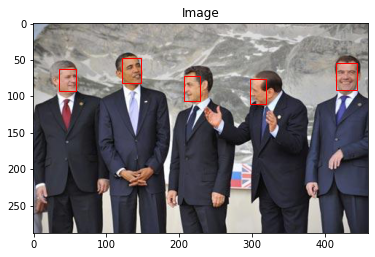

5



In [27]:
#Applying the functions to the 3 images.
for i in (image1, image2, image3):
    detected_faces = detect_faces(i)
    draw_image_with_boxes(i, detected_faces)

* From our results above, we can see that the mtcnn model counted the number of faces in each image correctly.